In [1]:
# Import all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime
import os

In [2]:
# Set current directory
newpath = os.chdir("/home/someshugar/Project2")
dirpath = os.getcwd()
print("current directory is : " + dirpath)

current directory is : /home/someshugar/Project2


In [3]:
# Get file path
Train_file = "/home/someshugar/Project2/train_cab.csv"
Test_file = "/home/someshugar/Project2/test.csv"

In [4]:
Train_data = pd.read_csv(Train_file)
print(Train_data.shape)
Test_data = pd.read_csv(Test_file)
print(Test_data.shape)

(16067, 7)
(9914, 6)


In [5]:
Train_data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [6]:
Test_data.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [7]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16043 non-null object
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(5), object(2)
memory usage: 878.7+ KB


In [8]:
Train_data.isnull().sum()

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [9]:
Train_data.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [10]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


In [11]:
Test_data.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [12]:
Train_data.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [13]:
Train_data.passenger_count.value_counts()

1.00       11259
2.00        2322
5.00        1045
3.00         676
4.00         329
6.00         302
0.00          57
43.00          2
53.00          2
0.12           1
1.30           1
531.20         1
345.00         1
456.00         1
87.00          1
55.00          1
58.00          1
236.00         1
535.00         1
536.00         1
537.00         1
554.00         1
5334.00        1
35.00          1
5345.00        1
557.00         1
354.00         1
Name: passenger_count, dtype: int64

In [14]:
Train_data = Train_data[(Train_data.passenger_count>=1) & (Train_data.passenger_count<=6)]

In [15]:
Train_data = Train_data.drop(Train_data[Train_data.passenger_count == 1.3].index, axis=0)

In [16]:
Train_data.passenger_count.isnull().sum()

0

In [17]:
Train_data.passenger_count.value_counts()

1.0    11259
2.0     2322
5.0     1045
3.0      676
4.0      329
6.0      302
Name: passenger_count, dtype: int64

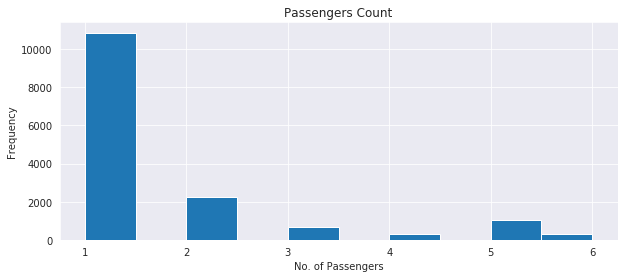

In [83]:
fig, ax = plt.subplots(figsize=(10,4))
Train_data.passenger_count.plot(kind='hist')
ax.set(xlabel='No. of Passengers', ylabel='Frequency', title='Passengers Count')
plt.savefig('Figure1.png')
plt.show()

In [19]:
Train_data['fare_amount'] = Train_data['fare_amount'].map(lambda x :  str(x).replace("-",""))
Train_data['fare_amount'] = Train_data['fare_amount'].astype(float)

In [20]:
Train_data.fare_amount.dtype

dtype('float64')

In [21]:
Train_data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15910.000000,15933.000000,15933.000000,15933.000000,15933.000000,15933.000000
mean,15.086720,-72.468617,39.917943,-72.458874,39.895855,1.649658
std,432.254817,10.559654,6.825582,10.587461,6.196463,1.265933
min,0.000000,-74.438233,-74.006893,-74.429332,-74.006377,1.000000
25%,6.000000,-73.992148,40.734938,-73.991182,40.734662,1.000000
50%,8.500000,-73.981675,40.752633,-73.980155,40.753565,1.000000
75%,12.500000,-73.966800,40.767392,-73.963598,40.768026,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,6.000000


In [22]:
Train_data.fare_amount.describe()

count    15910.000000
mean        15.086720
std        432.254817
min          0.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [23]:
Train_data.isnull().sum()

fare_amount          23
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
dtype: int64

In [24]:
Train_data = Train_data[(Train_data.fare_amount>Train_data.fare_amount.quantile(.001)) & 
                        (Train_data.fare_amount<Train_data.fare_amount.quantile(.999))]

In [25]:
Train_data.fare_amount.describe()

count    15822.000000
mean        11.289835
std          9.271078
min          2.900000
25%          6.000000
50%          8.500000
75%         12.500000
max         82.500000
Name: fare_amount, dtype: float64

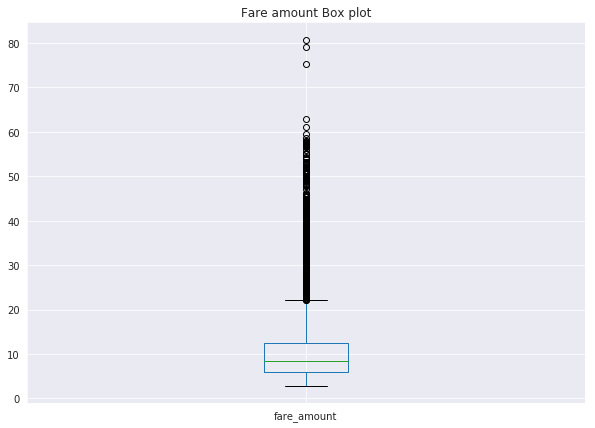

In [84]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,7))
Train_data['fare_amount'].plot(kind='box')
ax.set(title='Fare amount Box plot')
plt.savefig('Figure2.png')
plt.show()

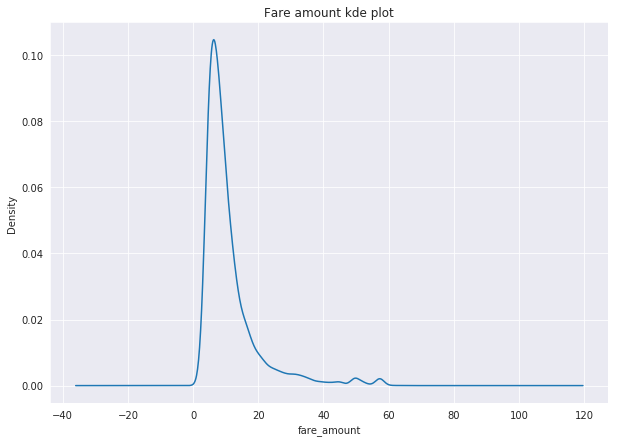

In [85]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,7))
Train_data['fare_amount'].plot(kind='kde')
ax.set(xlabel='fare_amount',title='Fare amount kde plot')
plt.savefig('Figure3.png')
plt.show()


In [28]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15822 entries, 0 to 16065
Data columns (total 7 columns):
fare_amount          15822 non-null float64
pickup_datetime      15822 non-null object
pickup_longitude     15822 non-null float64
pickup_latitude      15822 non-null float64
dropoff_longitude    15822 non-null float64
dropoff_latitude     15822 non-null float64
passenger_count      15822 non-null float64
dtypes: float64(6), object(1)
memory usage: 988.9+ KB


In [29]:
Train_data['pickup_datetime'] = pd.to_datetime(Train_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S %Z',
                                               errors='coerce')


In [30]:
Train_data.isnull().sum()

fare_amount          0
pickup_datetime      1
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [31]:
Train_data = Train_data.dropna()

In [32]:
Train_data.pickup_datetime.dtype

datetime64[ns, UTC]

In [33]:
Train_data['pickup_datetime'] = pd.to_datetime(Train_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S %Z',
                                               errors='coerce')

In [34]:
Train_data['pickup_month'] = Train_data['pickup_datetime'].dt.month
Train_data['pickup_year'] = Train_data['pickup_datetime'].dt.year
Train_data['pickup_day'] = Train_data['pickup_datetime'].dt.day
Train_data['pickup_weekday'] = Train_data['pickup_datetime'].dt.weekday
Train_data['pickup_hour'] = Train_data['pickup_datetime'].dt.hour

In [35]:
Train_data = Train_data.drop('pickup_datetime',axis=1)

In [36]:
Test_data['pickup_datetime'] = pd.to_datetime(Test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S %Z',
                                               errors='coerce')

In [37]:
Test_data['pickup_month'] = Test_data['pickup_datetime'].dt.month
Test_data['pickup_year'] = Test_data['pickup_datetime'].dt.year
Test_data['pickup_day'] = Test_data['pickup_datetime'].dt.day
Test_data['pickup_weekday'] = Test_data['pickup_datetime'].dt.weekday
Test_data['pickup_hour'] = Test_data['pickup_datetime'].dt.hour

In [38]:
Test_data = Test_data.drop('pickup_datetime',axis=1)

In [39]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15821 entries, 0 to 16065
Data columns (total 11 columns):
fare_amount          15821 non-null float64
pickup_longitude     15821 non-null float64
pickup_latitude      15821 non-null float64
dropoff_longitude    15821 non-null float64
dropoff_latitude     15821 non-null float64
passenger_count      15821 non-null float64
pickup_month         15821 non-null int64
pickup_year          15821 non-null int64
pickup_day           15821 non-null int64
pickup_weekday       15821 non-null int64
pickup_hour          15821 non-null int64
dtypes: float64(6), int64(5)
memory usage: 1.4 MB


In [40]:
Train_data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_year,pickup_day,pickup_weekday,pickup_hour
count,15821.000000,15821.000000,15821.000000,15821.000000,15821.000000,15821.000000,15821.000000,15821.000000,15821.000000,15821.000000,15821.000000
mean,11.289822,-72.523582,39.948090,-72.518396,39.928443,1.651223,6.265154,2011.732823,15.666835,3.036091,13.500411
std,9.271371,10.374562,6.745591,10.387128,6.095346,1.266945,3.446637,1.867204,8.682986,1.968532,6.520159
min,2.900000,-74.438233,-74.006893,-74.227047,-74.006377,1.000000,1.000000,2009.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992160,40.735045,-73.991182,40.734871,1.000000,3.000000,2010.000000,8.000000,1.000000,9.000000
50%,8.500000,-73.981722,40.752666,-73.980185,40.753597,1.000000,6.000000,2012.000000,16.000000,3.000000,14.000000
75%,12.500000,-73.966941,40.767392,-73.963800,40.768028,2.000000,9.000000,2013.000000,23.000000,5.000000,19.000000
max,82.500000,40.766125,401.083332,40.802437,41.366138,6.000000,12.000000,2015.000000,31.000000,6.000000,23.000000


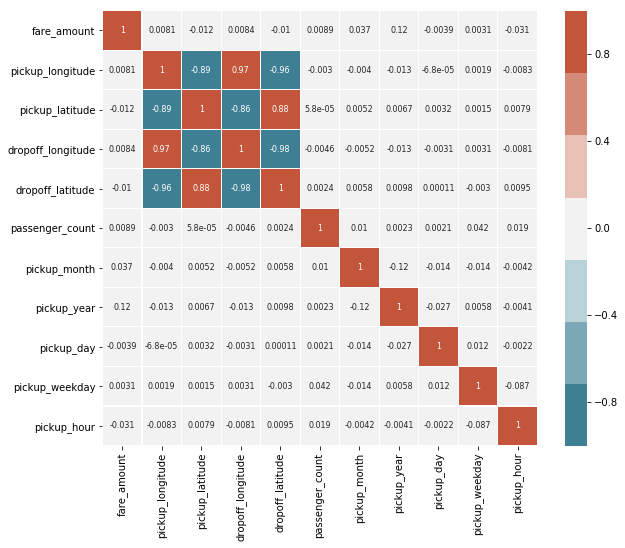

In [41]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(Train_data.corr(),cmap=sns.diverging_palette(220, 20, n=7), vmax=1.0, vmin=-1.0, linewidths=0.1,
annot=True, annot_kws={"size": 8}, square=True) 
plt.savefig('Figure4.png') 
plt.show()

In [42]:
coord = ['pickup_longitude','pickup_latitude', 
          'dropoff_longitude', 'dropoff_latitude']
for i in coord: 
    Train_data = Train_data[(Train_data[i]   > Train_data[i].quantile(.001)) & 
                        (Train_data[i] < Train_data[i].quantile(.999))]
    
#create new variable log of fare amount
Train_data["log_fare_amount"] = np.log(Train_data["fare_amount"])
    
Train_data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_year,pickup_day,pickup_weekday,pickup_hour,log_fare_amount
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,6,2009,15,0,17,1.504077
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,1,2010,5,1,16,2.827314
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,8,2011,18,3,0,1.740466
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,4,2012,21,5,4,2.041220
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,3,2010,9,1,7,1.667707


# Finding distances based on Latitude and Longitude

The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes.

Formula

dlon = lon2 - lon1

dlat = lat2 - lat1

a = (sin(dlat/2))^2 + cos(lat1) cos(lat2) (sin(dlon/2))^2
i
c = 2 * atan2( sqrt(a), sqrt(1-a) )

d = R * c (where R is the radius of the Earth)


In [43]:
#radius of earth in kilometers
R = 6373.0

pickup_lat  = np.radians(Train_data["pickup_latitude"])
pickup_lon  = np.radians(Train_data["pickup_longitude"])
dropoff_lat = np.radians(Train_data["dropoff_latitude"])
dropoff_lon = np.radians(Train_data["dropoff_longitude"])

dist_lon = dropoff_lon - pickup_lon
dist_lat = dropoff_lat - pickup_lat

#Formula
a = (np.sin(dist_lat/2))**2 + np.cos(pickup_lat) * np.cos(dropoff_lat) * (np.sin(dist_lon/2))**2 
c = 2 * np.arctan2( np.sqrt(a), np.sqrt(1-a) ) 
d = R * c #(where R is the radius of the Earth)

Train_data["trip_distance_km"] = d

#create new variable log of distance
Train_data["log_trip_distance"] = np.log(Train_data["trip_distance_km"])

Train_data[coord + ["trip_distance_km"]].head(7)

/home/someshugar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_distance_km
0,-73.844311,40.721319,-73.841610,40.712278,1.031088
1,-74.016048,40.711303,-73.979268,40.782004,8.452786
2,-73.982738,40.761270,-73.991242,40.750562,1.389961
3,-73.987130,40.733143,-73.991567,40.758092,2.800149
4,-73.968095,40.768008,-73.956655,40.783762,1.999784
5,-74.000964,40.731630,-73.972892,40.758233,3.788428
6,-73.980002,40.751662,-73.973802,40.764842,1.556295


In [44]:

pickup_lat  = np.radians(Test_data["pickup_latitude"])
pickup_lon  = np.radians(Test_data["pickup_longitude"])
dropoff_lat = np.radians(Test_data["dropoff_latitude"])
dropoff_lon = np.radians(Test_data["dropoff_longitude"])

dist_lon = dropoff_lon - pickup_lon
dist_lat = dropoff_lat - pickup_lat

#Formula
a = (np.sin(dist_lat/2))**2 + np.cos(pickup_lat) * np.cos(dropoff_lat) * (np.sin(dist_lon/2))**2 
c = 2 * np.arctan2( np.sqrt(a), np.sqrt(1-a) ) 
d = R * c #(where R is the radius of the Earth)

Test_data["trip_distance_km"] = d

#create new variable log of distance
Test_data["log_trip_distance"] = np.log(Test_data["trip_distance_km"])

Test_data[coord + ["trip_distance_km"]].head(7)

/home/someshugar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_distance_km
0,-73.973320,40.763805,-73.981430,40.743835,2.323989
1,-73.986862,40.719383,-73.998886,40.739201,2.426114
2,-73.982524,40.751260,-73.979654,40.746139,0.618822
3,-73.981160,40.767807,-73.990448,40.751635,1.961648
4,-73.966046,40.789775,-73.988565,40.744427,5.388992
5,-73.960983,40.765547,-73.979177,40.740053,3.223561
6,-73.949013,40.773204,-73.959622,40.770893,0.929893


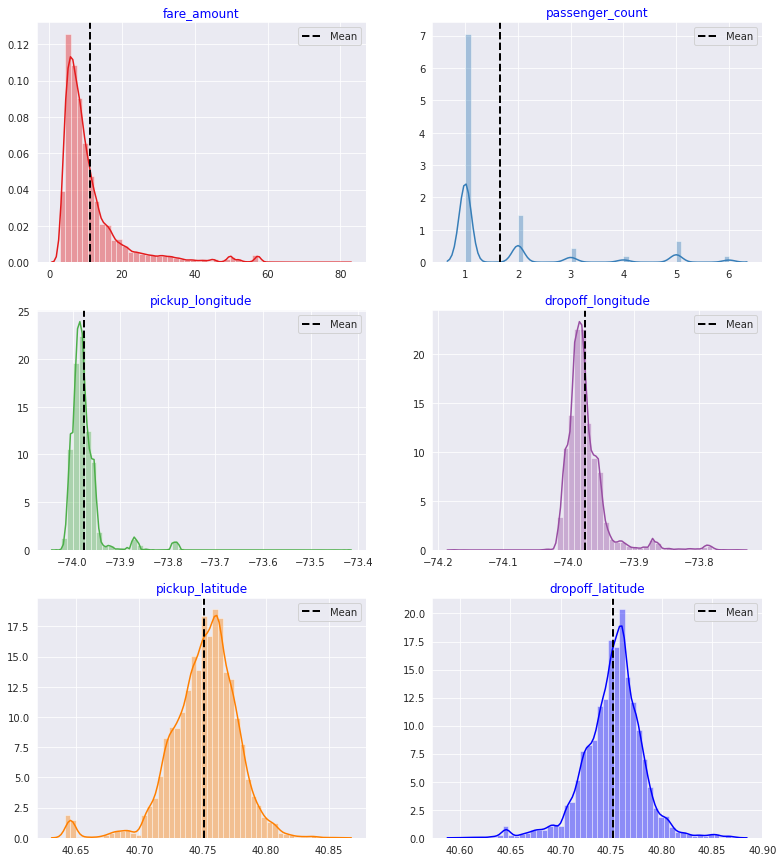

In [45]:
import itertools

cols = ['fare_amount','passenger_count', 
        'pickup_longitude', 'dropoff_longitude',
        'pickup_latitude', 'dropoff_latitude']

length = len(cols)
cs     = [(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
          (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
          (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
          (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
          (1.0, 0.4980392156862745, 0.0),"b"]

sns.set_style("darkgrid")
plt.figure(figsize = (13,15))
for i,j,k in itertools.zip_longest(cols,range(length),cs) :
    plt.subplot(length/2,length/3,j+1)
    sns.distplot(Train_data[i],color = k)
    plt.axvline(Train_data[i].mean(),linewidth  = 2 ,
                linestyle = "dashed",color = "k" ,
                label = "Mean")
    plt.legend(loc = "best")
    plt.title(i,color = "b")
    plt.xlabel("")
plt.savefig('Figure5.png')

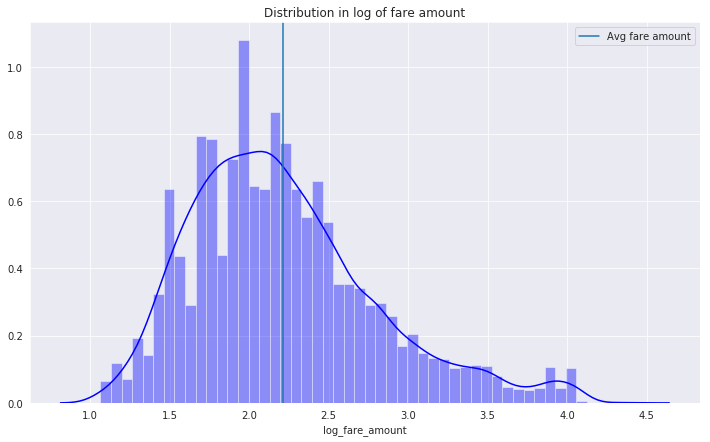

In [46]:
plt.figure(figsize = (12,7))
sns.distplot(Train_data["log_fare_amount"],color = "b")
plt.axvline(Train_data["log_fare_amount"].mean(),label = "Avg fare amount")
plt.title("Distribution in log of fare amount")
plt.legend()
plt.savefig('Figure6.png')
plt.show()

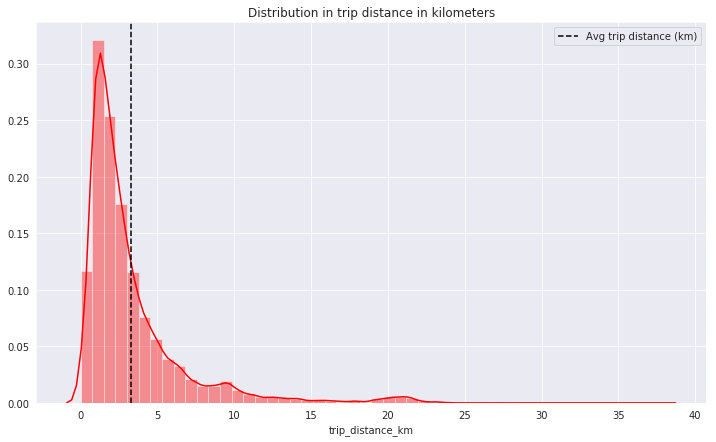

In [47]:
plt.figure(figsize = (12,7))
sns.distplot(Train_data["trip_distance_km"],color = "r")
plt.axvline(Train_data["trip_distance_km"].mean(),color = "k",
            linestyle = "dashed",label = "Avg trip distance (km)")
plt.title("Distribution in trip distance in kilometers")
plt.legend()
plt.savefig('Figure7.png')
plt.show()

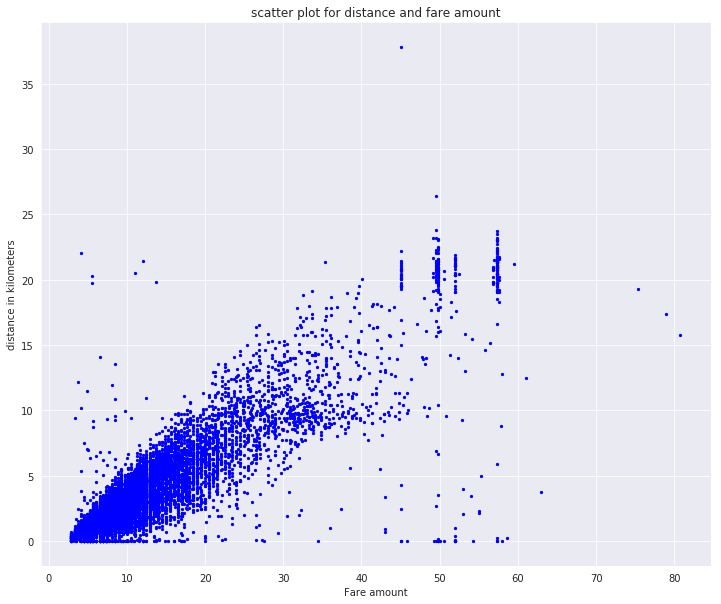

In [48]:
plt.figure(figsize = (12,10))

plt.scatter(Train_data["fare_amount"],
            Train_data["trip_distance_km"],s = 5,
            linewidths=1, c = "b")
plt.ylabel("distance in kilometers")
plt.xlabel("Fare amount")
plt.title("scatter plot for distance and fare amount")
plt.savefig('Figure8.png')
plt.show()

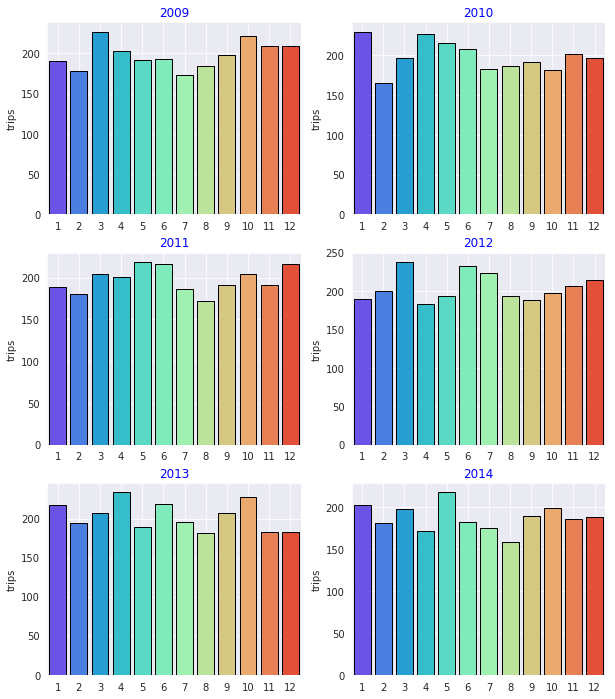

In [49]:
yrs = [i for i in Train_data["pickup_year"].unique().tolist() if i not in [2015]]

#subset data without year 2015
complete_dat = Train_data[Train_data["pickup_year"].isin(yrs)]


plt.figure(figsize = (10,12))
for i,j in itertools.zip_longest(yrs,range(len(yrs))) :
    plt.subplot(3,2,j+1)
    trip_counts_mn = complete_dat[complete_dat["pickup_year"] == i]["pickup_month"].value_counts()
    trip_counts_mn = trip_counts_mn.reset_index()
    sns.barplot(trip_counts_mn["index"],trip_counts_mn["pickup_month"],
                palette = "rainbow",linewidth = 1,
                edgecolor = "k"*complete_dat["pickup_month"].nunique() 
               )
    plt.title(i,color = "b",fontsize = 12)
    plt.grid(True)
    plt.xlabel("")
    plt.ylabel("trips")
plt.savefig('Figure9.png')

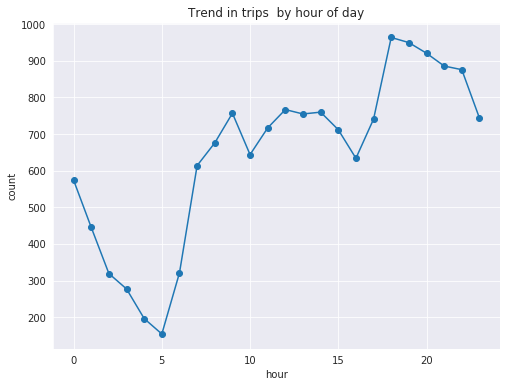

In [50]:
fig, ax = plt.subplots(figsize=(8,6))
trips_hr = Train_data["pickup_hour"].value_counts().reset_index()
trips_hr.columns = ["pickup_hour","count"]
trips_hr = trips_hr.sort_values(by = "pickup_hour",ascending = True)

plt.plot(trips_hr["pickup_hour"],trips_hr["count"],'-o')
ax.set(title = "Trend in trips  by hour of day",
                        xlabel = "hour",
                        ylabel = "count")
plt.savefig('Figure10.png')                  

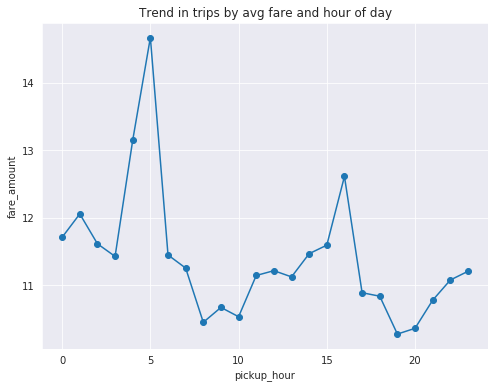

In [51]:
avg_fare_hr = Train_data.groupby("pickup_hour")["fare_amount"].mean().reset_index()
fig, ax = plt.subplots(figsize=(8,6))

plt.plot(avg_fare_hr["pickup_hour"],avg_fare_hr["fare_amount"],'-o')
ax.set(title = "Trend in trips by avg fare and hour of day",
                        xlabel = "pickup_hour",
                        ylabel = "fare_amount")
plt.savefig('Figure11.png')

In [52]:
Train_data.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_month', 'pickup_year', 'pickup_day', 'pickup_weekday',
       'pickup_hour', 'log_fare_amount', 'trip_distance_km',
       'log_trip_distance'],
      dtype='object')

In [53]:
train = Train_data

In [54]:
train = train.drop(['log_fare_amount','log_trip_distance'],axis=1)

In [55]:
train.shape

(15404, 12)

In [56]:
train.shape

(15404, 12)

In [57]:
train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_month', 'pickup_year', 'pickup_day', 'pickup_weekday',
       'pickup_hour', 'trip_distance_km'],
      dtype='object')

# LinearRegression Model

In [58]:
y = train.fare_amount
X = train.drop(['fare_amount'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

model= LinearRegression()
model.fit(X_train,y_train)
y_pred_lm = model.predict(X_test)


In [59]:
print('Root Mean Squared Error: ' + str(mean_squared_error(y_test, y_pred_lm) ** 0.5))

Root Mean Squared Error: 4.1774659615059555


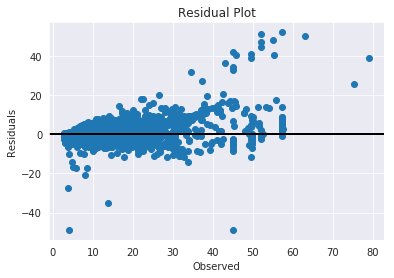

In [60]:
# Plot the residuals
residuals = y_test-y_pred_lm
fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text('Residual Plot')
plt.savefig('Figure12.png')
plt.show()

In [61]:
df_dummy = train

In [62]:
df_dummy.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_year,pickup_day,pickup_weekday,pickup_hour,trip_distance_km
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,6,2009,15,0,17,1.031088
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,1,2010,5,1,16,8.452786
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,8,2011,18,3,0,1.389961
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,4,2012,21,5,4,2.800149
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,3,2010,9,1,7,1.999784


# DecisionTreeRegressor

In [63]:
y = df_dummy.fare_amount
X = df_dummy.drop(['fare_amount'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=10)


In [64]:
model= DecisionTreeRegressor(max_depth = 10)
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [65]:
y_pred_dec = model.predict(X_test)

In [66]:
print('Root Mean Square Error: ' + str(mean_squared_error(y_test, y_pred_dec) ** 0.5))

Root Mean Square Error: 3.9583103136315687


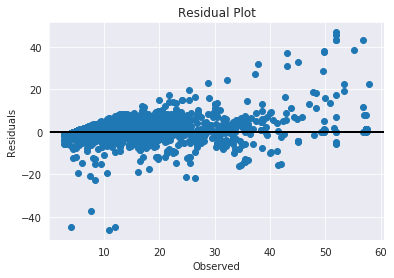

In [67]:
#Residual Plot
residuals = y_test-y_pred_dec
fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text('Residual Plot')
plt.savefig('Figure13.png')
plt.show()


# RandomForestRegressor

In [68]:
y = df_dummy.fare_amount
X = df_dummy.drop(['fare_amount'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=10)


In [69]:
model= RandomForestRegressor(max_depth=10)
model.fit(X_train,y_train)

/home/someshugar/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [70]:
y_pred_rf = model.predict(X_test)

In [71]:
print('Root Mean Square Error: ' + str(mean_squared_error(y_test, y_pred_rf) ** 0.5))

Root Mean Square Error: 3.6978677500332244


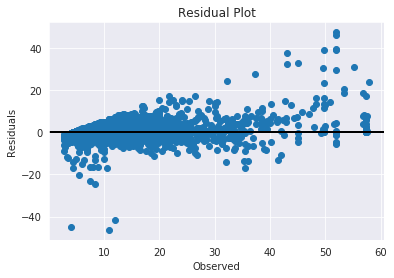

In [72]:
#Residual Plot
residuals = y_test-y_pred_rf
fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text('Residual Plot')
plt.savefig('Figure14.png')
plt.show()

Hence Random forest has less RMSE we choose Random forest model to make Predictions from test 

In [73]:
Test_data.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'pickup_month', 'pickup_year',
       'pickup_day', 'pickup_weekday', 'pickup_hour', 'trip_distance_km',
       'log_trip_distance'],
      dtype='object')

In [74]:
# Test_data = Test_data.drop(['pickup_longitude' ,'pickup_latitude' ,'dropoff_longitude','dropoff_latitude'],axis=1)

In [75]:
test = Test_data.drop(['log_trip_distance'],axis=1)

In [76]:
train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_month', 'pickup_year', 'pickup_day', 'pickup_weekday',
       'pickup_hour', 'trip_distance_km'],
      dtype='object')

In [77]:
test.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'pickup_month', 'pickup_year',
       'pickup_day', 'pickup_weekday', 'pickup_hour', 'trip_distance_km'],
      dtype='object')

In [78]:
train.shape

(15404, 12)

In [79]:
test.shape

(9914, 11)

In [80]:
#Predict from test set
y_train = train.fare_amount
X_train = train.drop(['fare_amount'],axis=1)

X_test = test

model= RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

/home/someshugar/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [81]:
prediction = pd.DataFrame(y_pred, columns=['Fare Amount']).to_csv('Cabfare.csv',index=False)


In [82]:
Cabfare = pd.read_csv("Cabfare.csv")
print(Cabfare.shape)
print(Cabfare.head())

(9914, 1)
   Fare Amount
0        12.25
1         9.75
2         3.88
3         9.20
4        14.90
